###  `EDA (Analisis exploratorio de datos)` 

In [3]:
# Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [6]:
df_movies = pd.read_csv("df_movies.csv",low_memory=False)

In [31]:
# Descripcion general
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565331 entries, 0 to 565330
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            565331 non-null  int64  
 1   budget                45451 non-null   float64
 2   movie_id              45451 non-null   float64
 3   popularity            45451 non-null   float64
 4   release_date          45451 non-null   object 
 5   revenue               45451 non-null   float64
 6   title                 45451 non-null   object 
 7   vote_average          45451 non-null   float64
 8   vote_count            45451 non-null   float64
 9   Genero                44982 non-null   object 
 10  name                  4497 non-null    object 
 11  company               41159 non-null   object 
 12  release_year          45451 non-null   float64
 13  retorno_de_inversion  40243 non-null   float64
 14  director              464899 non-null  object 
 15  

In [7]:
# Descripcion general
df_movies.describe( include ='all')

,Unnamed: 0,budget,movie_id,popularity,release_date,revenue,title,vote_average,vote_count,Genero,name,company,release_year,retorno_de_inversion,director,actor
count,565331.000000,4.545100e+04,45451.000000,45451.000000,45451,4.545100e+04,45451,45451.000000,45451.000000,44982,4497,41159,45451.000000,4.024300e+04,464899,562977
unique,NaN,NaN,NaN,NaN,17333,NaN,42195,NaN,NaN,20,1695,14015,NaN,NaN,157570,202700
top,NaN,NaN,NaN,NaN,2008-01-01,NaN,Blackout,NaN,NaN,Drama,The Bowery Boys,Warner Bros.,NaN,NaN,Cedric Gibbons,Bess Flowers
freq,NaN,NaN,NaN,NaN,136,NaN,13,NaN,NaN,10590,29,933,NaN,NaN,272,241
mean,282665.000000,4.220946e+06,107984.599745,2.926887,NaN,1.121930e+07,NaN,5.624085,109.989703,NaN,NaN,NaN,1991.882027,8.983976e+03,NaN,NaN
std,163197.146853,1.741722e+07,112111.336735,6.006458,NaN,6.433984e+07,NaN,1.915424,491.352336,NaN,NaN,NaN,24.057726,9.472967e+05,NaN,NaN
min,0.000000,0.000000e+00,2.000000,0.000000,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,1874.000000,0.000000e+00,NaN,NaN
25%,141332.500000,0.000000e+00,26367.500000,0.389095,NaN,0.000000e+00,NaN,5.000000,3.000000,NaN,NaN,NaN,1978.000000,0.000000e+00,NaN,NaN
50%,282665.000000,0.000000e+00,59871.000000,1.131386,NaN,0.000000e+00,NaN,6.000000,10.000000,NaN,NaN,NaN,2001.000000,0.000000e+00,NaN,NaN
75%,423997.500000,0.000000e+00,156327.500000,3.694370,NaN,0.000000e+00,NaN,6.800000,34.000000,NaN,NaN,NaN,2010.000000,0.000000e+00,NaN,NaN


Destacamos de esta tabla:

- Los juegos tienen fecha desde 1983 a 2017
 - La mayoria de los juegos son FREE
 - La mayoria de los comentarios son positivos
 - Hay un total de 16,715 registros de usuarios. De estos, 16,129 son únicos, lo que indica que algunos usuarios aparecen varias veces.
 

#### Valores duplicados

In [8]:
df_movies.columns

Index(['Unnamed: 0', 'budget', 'movie_id', 'popularity', 'release_date',
       'revenue', 'title', 'vote_average', 'vote_count', 'Genero', 'name',
       'company', 'release_year', 'retorno_de_inversion', 'director', 'actor'],
      dtype='object')

In [9]:
# Observamos si existen valores duplicados y si afecta en gran medida borrarlos
duplicados = df_movies.duplicated(subset=["movie_id","title"])
duplicados.value_counts()


True     519985
False     45346
Name: count, dtype: int64

In [33]:
# Eliminamos valores duplicados 
df_movies = df_movies.drop_duplicates(subset=["movie_id","title"])

#### Outliers (valores atipicos)

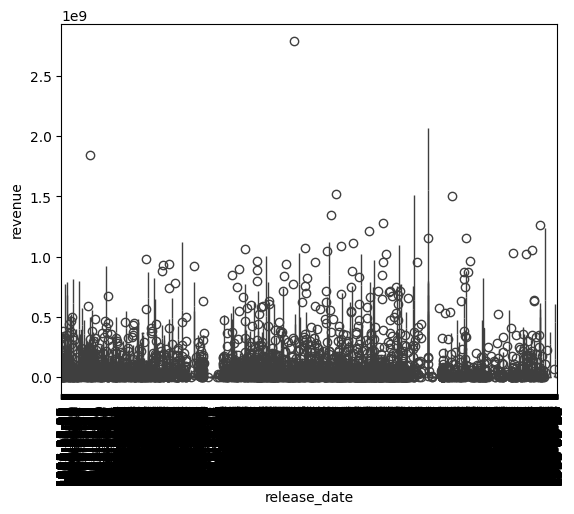

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un boxplot con 'item_name' en el eje x y 'price' en el eje y
sns.boxplot(x='release_date', y='revenue', data=df_movies)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

En esta grafica observamos que existen precios que pueden ser valores atipicos

##### Calculamos los posible outliers

In [19]:
# Calcular los outliers en la columna 'price'
Q1 = df_movies["revenue"].quantile(0.25)
Q3 = df_movies['revenue'].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Calculamos los limites
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR

In [21]:
# Observamos los outliers que superan los limites
outliers = df_movies[(df_movies['revenue'] < Limite_Inferior) | (df_movies['revenue'] > Limite_Superior)]

In [28]:
print("Los valores atipicos de precios que se presentaron con mayor frecuencia fueron 2219 registros:", outliers["revenue"].value_counts().sort_values())

Los valores atipicos de precios que se presentaron con mayor frecuencia fueron 2219 registros: revenue
72417394.0     1
122195920.0    1
21284514.0     1
23574130.0     1
327311859.0    1
              ..
10000000.0     5
11000000.0     5
2000000.0      6
5000000.0      7
6000000.0      8
Name: count, Length: 2104, dtype: int64


#### Distribucion de analisis de sentimiento por año

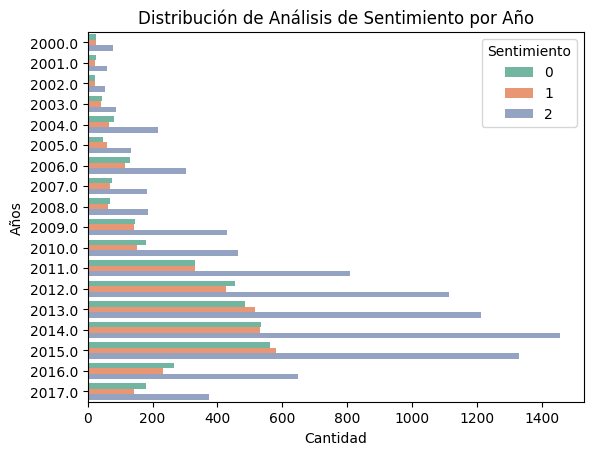

In [16]:
# Graficamos desde el año 2000 en adelante, si la columna "sentiment_analysis" son positivos, negativos o neutros
año_inicio = 2000
df_games_limitado = df_games[df_games['release_date'] >= año_inicio]
ax = sns.countplot(data=df_games_limitado, y='release_date', hue='sentiment_analysis', palette='Set2')
plt.title('Distribución de Análisis de Sentimiento por Año')
plt.xlabel('Cantidad')
plt.ylabel('Años')
plt.legend(title='Sentimiento')
plt.show()

En la gráfica, se observa que a medida que transcurren los años, la cantidad de comentarios positivos experimenta un gran aumento en comparación con los comentarios negativos y neutros.

#### Evolucion a lo largo de los años de comentatios positivos o negativos

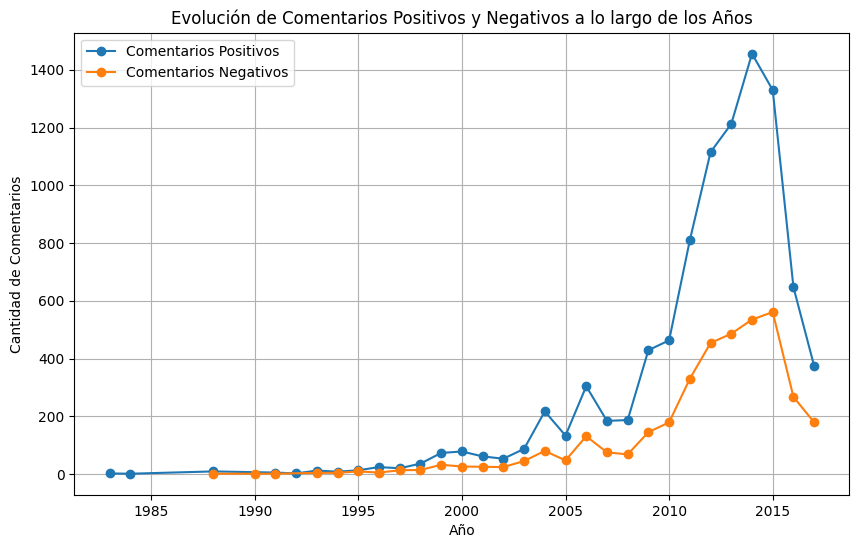

In [17]:
# Filtra los datos por sentimiento positivo
comentarios_positivos = df_games[df_games['sentiment_analysis'] == 2]

# Filtra los datos por sentimiento negativo
comentarios_negativos = df_games[df_games['sentiment_analysis'] == 0]

# Agrupa los datos por año y cuenta la cantidad de comentarios positivos y negativos por año
comentarios_positivos_por_año = comentarios_positivos.groupby('release_date').size()
comentarios_negativos_por_año = comentarios_negativos.groupby('release_date').size()

# Crea un gráfico de línea que muestra la evolución de los comentarios positivos y negativos a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(comentarios_positivos_por_año.index, comentarios_positivos_por_año, label='Comentarios Positivos', marker='o')
plt.plot(comentarios_negativos_por_año.index, comentarios_negativos_por_año, label='Comentarios Negativos', marker='o')
plt.title('Evolución de Comentarios Positivos y Negativos a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Comentarios')
plt.legend()
plt.grid(True)
plt.show()

Hasta aproximadamente el año 2000, la cantidad de comentarios positivos y negativos se mantuvo en equilibrio. Sin embargo, a partir de ese año, los comentarios positivos y negativos comenzaron a experimentar un crecimiento constante, las dos con fluctuaciones iguales, los comentarios positivos superaron significativamente a los negativos. Ambos tipos de comentarios alcanzaron su punto máximo alrededor del año 2015.